# Bayesian Decision Theory and Parametric Estimation

The dataset is a text file with a number of data
samples, one per line. Each line has the following structure:
$x_{i} y_{i} C_{i}$
,
where $(x_{i}, y_{i})$ ∈ $\mathbb{R^{2}}$ and $C_{i}$ ∈ ${0, 1, 2}$.


### (a) Use the data for classes 1 and 2 to estimate the parameters of a bivariate Gaussian distribution for each class. Assume that the covariance matrix is the same for both classes 
### (b) Write the parameters of the probability distribution functions for both classes.

### Parameters of a bivariate Gaussian distribution

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random

In [26]:
def readData(fileLocation):
    datafile = open(fileLocation)
    listadatos = datafile.read().splitlines()
    x = [[], [], []]
    y = [[], [], []]
    N = len(listadatos)
    i=0
    while N > 0:
        linea = listadatos[i].split(",")
        xi = float(linea[0])
        yi = float(linea[1])
        ci = int(linea[-1])
        x[ci].append(xi)
        y[ci].append(yi)
        i += 1
        N -= 1
    #print x,y Todos los valores de x e y para las respectivas clases 0, 1 y 2
    return x , y

x, y = readData("data.txt")

### Medias para la variable $x$ para las clase  $C_{1}$, $C_{2}$  respectivamente

In [53]:
meanx = []
for i in np.arange(1,3):
    meanx.append(np.mean(x[i]))
    print np.mean(x[i])

9.13579929
7.00126904


### Medias para la variable $y$ para las clase $C_{1}$, $C_{2}$  respectivamente

In [52]:
meany = []
for i in np.arange(1,3):
    meany.append(np.mean(y[i]))
    print np.mean(y[i])

5.94377044
3.58046306


### Matriz de covarianza para las clase $C_{1}$, $C_{2}$  respectivamente

In [56]:
cov = []
for i in np.arange(1,3):
    cov.append(np.cov(x[i], y[i]))
    print np.cov(x[i], y[i])
    
#np.cov?

[[ 1.55806041 -0.79318373]
 [-0.79318373  1.02515679]]
[[ 1.34995897  0.01292031]
 [ 0.01292031  1.18777045]]


### Distribuciones normales bivariadas para cada clase

In [91]:
meanc = []
normalBivariate = []
for i in range(2):
    meanc.append([meanx[i], meany[i]])
    normalBivariate.append(multivariate_normal(meanc[i], cov[i]))
    print np.random.multivariate_normal(meanc[i], cov[i])
    

[ 9.25502113  5.61034666]
[ 7.94798697  4.59379999]


### (c) Write a function that calculates the discriminant function for each class.

### (d) Draw a plot, where the regions corresponding to the different classes are shown with different colors. A region corresponding to a class is the set of points where the particular class discriminant function is maximum (decision regions, [Alp10] Sect. 3.4).

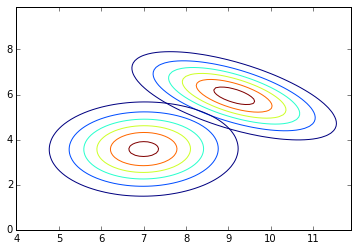

In [105]:
xplot, yplot = np.mgrid[4:12:0.1, 0:10:0.1]

pos = np.empty(xplot.shape + (2,))
pos[:, :, 0] = xplot; 
pos[:, :, 1] = yplot
fig, ax = plt.subplots()

for i in range(2):
    ax.contour(xplot, yplot, normalBivariate[i].pdf(pos))
 